<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/assessmentb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import sklearn
sklearn.set_config(transform_output="pandas")


!pip install category_encoders -q


%matplotlib inline


from sklearn.impute import SimpleImputer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline

from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [57]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Read Data

df_car = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adverts.csv')

df_car.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:

# Check info
df_car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [59]:
# Drop High Cardinality columns:
df_car = df_car.drop(columns = ['public_reference'])
df_car.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [62]:
from sklearn.compose import ColumnTransformer


target = 'price'
cat_feat = ['standard_colour', 'standard_make', 'standard_model','vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type'  ]
num_feat = ['mileage', 'reg_code', 'year_of_registration']

In [63]:
from sklearn.pipeline import Pipeline, make_pipeline

knn_pp_cat = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False, drop='if_binary'),
    KNeighborsClassifier(n_neighbors=11)
)




In [ ]:
knn_pp_cat.fit(X_train[cat_feat], y_train)

In [ ]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", MinMaxScaler())
    ]
)

In [ ]:
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(sparse_output=False, drop='if_binary')),
    ]
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_feat),
        ("cat", categorical_transformer, cat_feat),
    ]
)

In [ ]:
preprocessor.fit_transform(X_train)

In [ ]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", KNeighborsClassifier(n_neighbors=11))]
)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
imp = SimpleImputer(missing_values=0, strategy='median').set_output(transform='pandas')

In [ ]:
# Subset data: Apartments in "Capital Federal", less than 400,000
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    mask_apt = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] < 400_000
    df = df[mask_ba & mask_apt & mask_price]

    # Subset data: Remove outliers for "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]

In [ ]:
df_car_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                401878 non-null  float64
 1   standard_colour        396627 non-null  object 
 2   standard_make          402005 non-null  object 
 3   standard_model         402005 non-null  object 
 4   vehicle_condition      402005 non-null  object 
 5   year_of_registration   368694 non-null  float64
 6   price                  402005 non-null  int64  
 7   body_type              401168 non-null  object 
 8   crossover_car_and_van  402005 non-null  bool   
 9   fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 28.0+ MB


In [ ]:
# Convert the "year_of_registration	" column from numeric to object (string) data type
df_car_c['year_of_registration'] = df_car_c['year_of_registration'].astype(str)


In [ ]:
df_car_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                401878 non-null  float64
 1   standard_colour        396627 non-null  object 
 2   standard_make          402005 non-null  object 
 3   standard_model         402005 non-null  object 
 4   vehicle_condition      402005 non-null  object 
 5   year_of_registration   402005 non-null  object 
 6   price                  402005 non-null  int64  
 7   body_type              401168 non-null  object 
 8   crossover_car_and_van  402005 non-null  bool   
 9   fuel_type              401404 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 28.0+ MB


In [ ]:
# Calculate the mean of the "Value" column
mean_value = df_car_c[['mileage', 'price']].mean()

# Calculate the mode of the "Value" column
mode_value = df_car_c[['standard_colour', 'standard_make', 'standard_model',
        'vehicle_condition', 'year_of_registration', 'body_type', 'fuel_type']].mode().iloc[0]
[mean_value, mode_value]


[mileage    37743.595656
 price      17341.965799
 dtype: float64,
 standard_colour             Black
 standard_make                 BMW
 standard_model               Golf
 vehicle_condition            USED
 year_of_registration       2017.0
 body_type               Hatchback
 fuel_type                  Petrol
 Name: 0, dtype: object]

In [ ]:
df_car_c.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,nan,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:


# Replace missing values with the mean for numeric columns
num_col = df_car_c.select_dtypes(include=[np.number]).columns
df_car_c[num_col] = df_car_c[num_col].fillna(df_car_c[num_col].mean())

# Replace missing values with the mode for categorical columns
cat_col = df_car_c.select_dtypes(include=['object']).columns
df_car_c[cat_col] = df_car_c[cat_col].fillna(df_car_c[cat_col].mode().iloc[0])

# Print the DataFrame after filling
df_car_c.head()


,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,nan,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:


# Create separate imputers for numeric and categorical features
num_imputer = SimpleImputer(strategy='mean')
cate_imputer = SimpleImputer(strategy='most_frequent')


# Identify numeric and categorical columns
num_cols = df_car_c.select_dtypes(include=[np.number]).columns
cate_cols = df_car_c.select_dtypes(include=['object']).columns


#[num_cols.shape, cate_cols.shape]
num_cols[0]


'mileage'

In [ ]:
# Impute missing values for numeric and categorical features

df_car_c[num_cols] = num_imputer.fit_transform(df_car[num_cols])

df_car_c[cate_cols] = cate_imputer.fit_transform(df_car[cate_cols])



In [ ]:
df_car_c[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   mileage  402005 non-null  float64
 1   price    402005 non-null  float64
dtypes: float64(2)
memory usage: 6.1 MB


In [ ]:
df_car_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                402005 non-null  float64
 1   standard_colour        402005 non-null  object 
 2   standard_make          402005 non-null  object 
 3   standard_model         402005 non-null  object 
 4   vehicle_condition      402005 non-null  object 
 5   year_of_registration   402005 non-null  object 
 6   price                  402005 non-null  float64
 7   body_type              402005 non-null  object 
 8   crossover_car_and_van  402005 non-null  bool   
 9   fuel_type              402005 non-null  object 
dtypes: bool(1), float64(2), object(7)
memory usage: 28.0+ MB


In [ ]:
# Get the total count of missing values in each column
df_car_c.isnull().sum()


mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [ ]:
df_car_c.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,2017.0,73970.0,SUV,False,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000.0,Saloon,False,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000.0,SUV,False,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995.0,Hatchback,False,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995.0,SUV,False,Diesel


In [ ]:
df_car_c.iloc[0,0]

0.0

In [ ]:
# Impute missing values for numeric and categorical features
car_df[num_cols] = num_imputer.fit_transform(car_df[num_cols])
car_df[cate_cols] = cate_imputer.fit_transform(car_df[cate_cols])

In [ ]:
# Create separate imputers for numeric and categorical features
num_imputer = SimpleImputer(strategy='mean')
cate_imputer = SimpleImputer(strategy='most_frequent')

# Identify numeric, categorical, boolean columns
num_cols = car_df.select_dtypes(include=['number']).columns
cate_cols = car_df.select_dtypes(include=['object']).columns
bool_cols = car_df.select_dtypes(include=['bool']).columns

# Impute missing values for numeric and categorical features
car_df[num_cols] = num_imputer.fit_transform(car_df[num_cols])
car_df[cate_cols] = cate_imputer.fit_transform(car_df[cate_cols])


# Impute missing values for boolean features with the most frequent value
for i in bool_cols:
    most_frequent_value = car_df[i].mode()[0]
    car_df[i].fillna(most_frequent_value, inplace=True)



In [ ]:
# Get the total count of missing values in each column
car_df.isnull().sum()


mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Melt the DataFrame to long format for boxplot
df_melted = pd.melt(car_df, id_vars=[], value_vars=car_df.columns, var_name='standard_colour')

# Create a boxplot for multiple categorical columns
plt.figure(figsize=(12, 8))
sns.boxplot(x='standard_colour', data=df_melted, palette='Set2')
plt.title('Boxplot of Category Counts for Several Categorical Columns')
plt.show()


TypeError: ignored

<Figure size 1200x800 with 0 Axes>

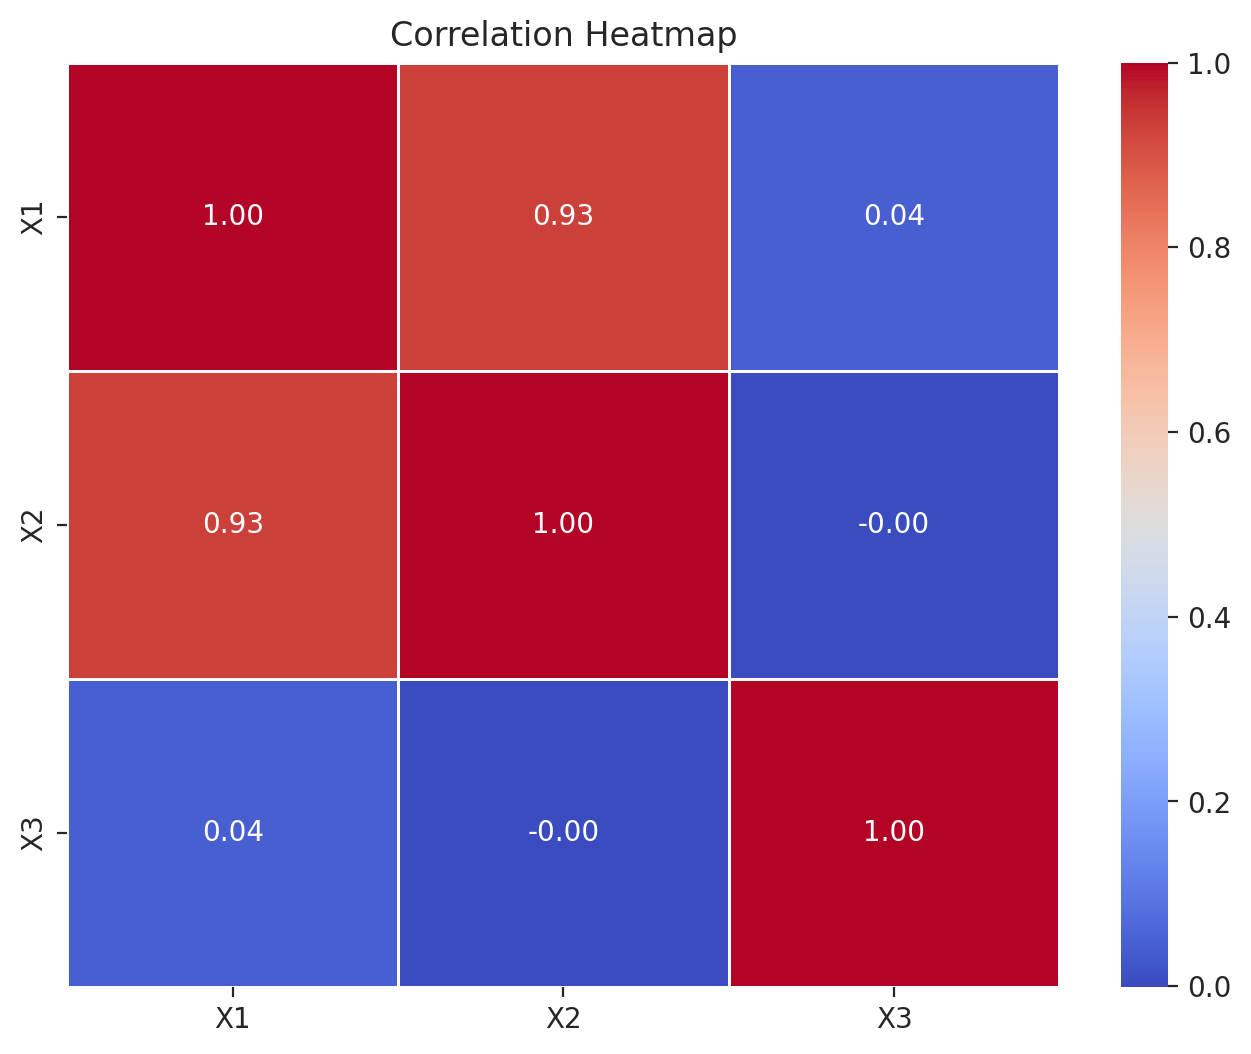

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame with three correlated variables
data = {
    'X1': np.random.rand(100),
    'X2': 2 * np.random.rand(100) + 0.5,
    'X3': 3 * np.random.rand(100) - 1
}

df = pd.DataFrame(data)

# Introducing multicollinearity by creating a linear relationship between X1 and X2
df['X2'] = df['X1'] + np.random.normal(scale=0.1, size=len(df))

# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


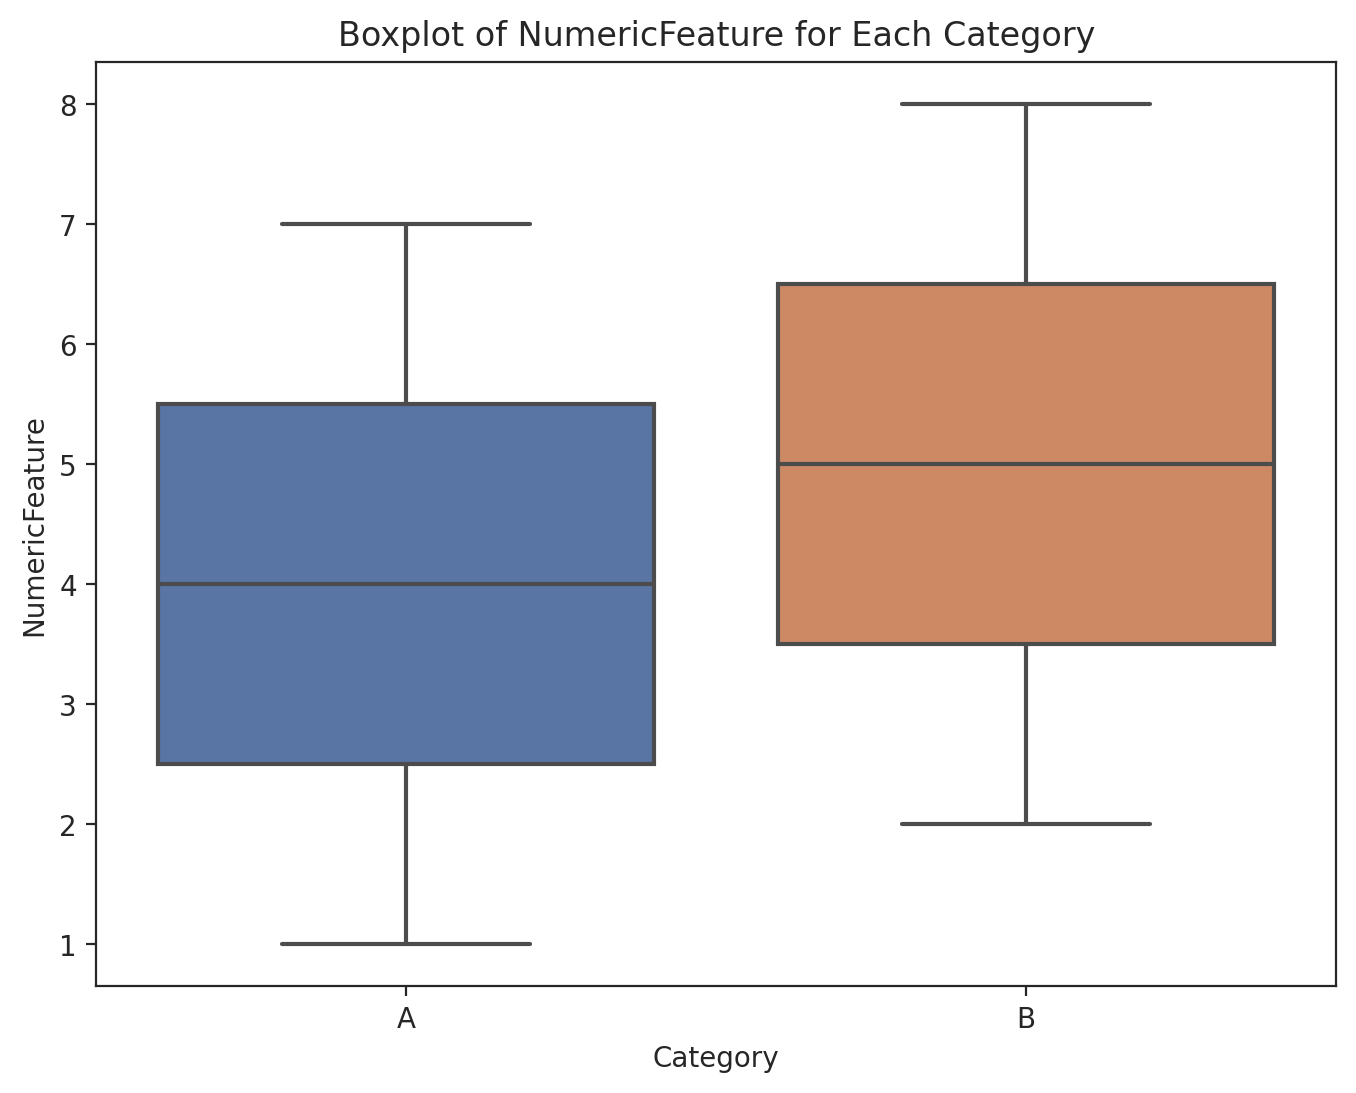

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a sample DataFrame with a categorical feature and a numerical feature
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'NumericFeature': [1, 2, 3, 4, 5, 6, 7, 8]
}

df = pd.DataFrame(data)

# Create a boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='NumericFeature', data=df)
plt.title('Boxplot of NumericFeature for Each Category')
plt.show()
